# Lab 6: Transformations and Linear Regression

## Objectives

- Use tranformations to linearize the data.
- Fit a linear regression model to the transformed data.
- Make a predictions using your model.

## Dataset

For this lab, we will be using synthetic data for house size (sq ft) and house price (thousands of dollars). You can download it [here](https://drive.google.com/uc?export=download&id=1LhiiA2_Rcu6DVqbMwMQY9Cfj92VFiJJ8). In the csv, there are 2 columns: `Size` and `Price`.

### 1. Load Data and Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the data
data = pd.read_csv('data.csv') # Your code here
print("First 5 rows of the generated data:")
print(data.head())

First 5 rows of the generated data:
          Size     Price
0  1347.930231  2.368646
1  2507.146699  5.132354
2  3635.544361  7.982506
3  2642.351537  5.815469
4  2060.411328  3.595922


### 2. Explore the Data

- Plot `Size` vs `Price`.

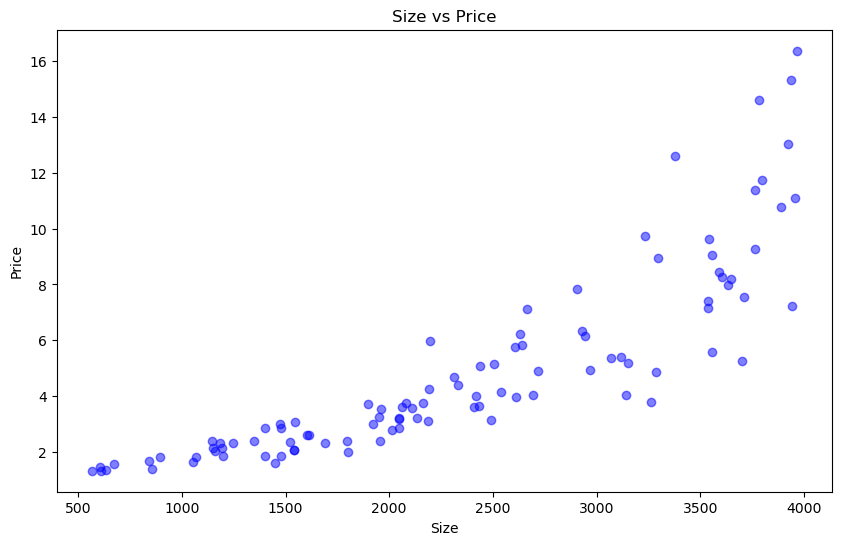

In [2]:
# Your code here
plt.figure(figsize=(10, 6))
plt.scatter(data['Size'], data['Price'], color='blue', alpha=0.5)
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Size vs Price')
plt.show()

### 3. Transform the Data

- Find transformations to linearize the data.
- Apply transformations.
- Plot the transformed data.

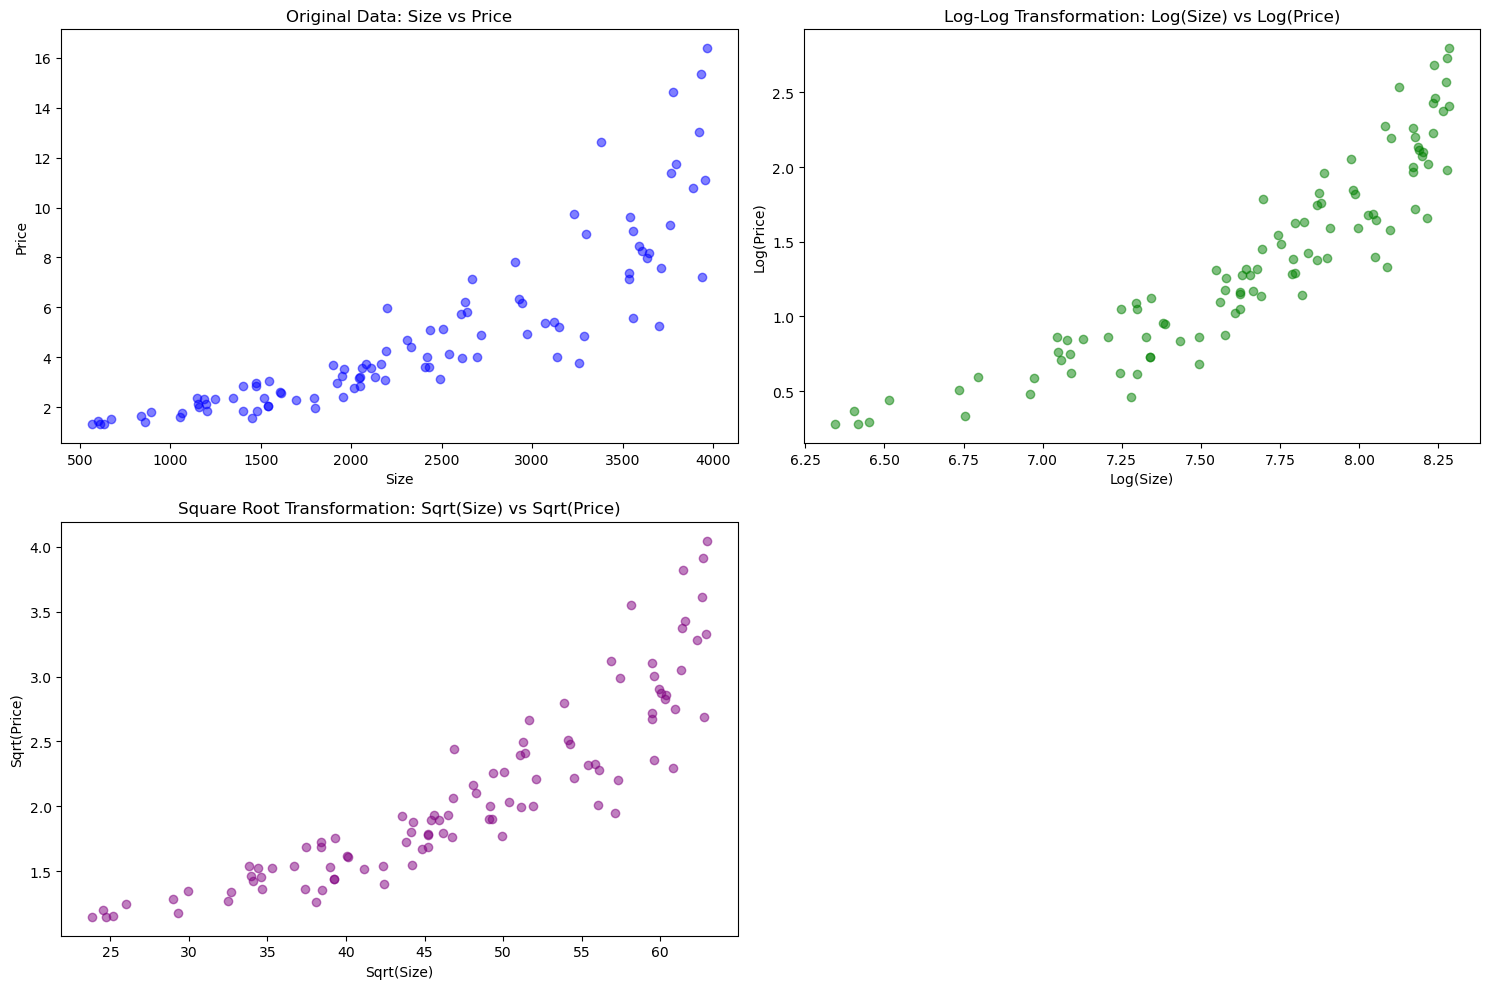

In [3]:
# 对数据应用对数变换
data['Log_Size'] = np.log(data['Size'])
data['Log_Price'] = np.log(data['Price'])

# 对数据应用平方根变换
data['Sqrt_Size'] = np.sqrt(data['Size'])
data['Sqrt_Price'] = np.sqrt(data['Price'])

# 绘制变换后的数据
plt.figure(figsize=(15, 10))

# 原始数据散点图
plt.subplot(2, 2, 1)
plt.scatter(data['Size'], data['Price'], color='blue', alpha=0.5)
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Original Data: Size vs Price')

# 对数变换后的散点图
plt.subplot(2, 2, 2)
plt.scatter(data['Log_Size'], data['Log_Price'], color='green', alpha=0.5)
plt.xlabel('Log(Size)')
plt.ylabel('Log(Price)')
plt.title('Log-Log Transformation: Log(Size) vs Log(Price)')

# 平方根变换后的散点图
plt.subplot(2, 2, 3)
plt.scatter(data['Sqrt_Size'], data['Sqrt_Price'], color='purple', alpha=0.5)
plt.xlabel('Sqrt(Size)')
plt.ylabel('Sqrt(Price)')
plt.title('Square Root Transformation: Sqrt(Size) vs Sqrt(Price)')

plt.tight_layout()
plt.show()# Your code here

### 4. Fit Linear Model

- Fit the regression model to transformed data.
- Report your obtained coefficients.

In [4]:
# Your code here# 创建线性回归模型
model_log = LinearRegression()
model_sqrt = LinearRegression()

# 用对数变换后的数据拟合模型
X_log = data[['Log_Size']].values  # 解释变量
y_log = data['Log_Price'].values   # 响应变量
model_log.fit(X_log, y_log)

# 用平方根变换后的数据拟合模型
X_sqrt = data[['Sqrt_Size']].values
y_sqrt = data['Sqrt_Price'].values
model_sqrt.fit(X_sqrt, y_sqrt)

# 输出获得的回归系数
print("Log-Log Transformation Model Coefficients:")
print("Intercept:", model_log.intercept_)
print("Slope:", model_log.coef_[0])

print("\nSquare Root Transformation Model Coefficients:")
print("Intercept:", model_sqrt.intercept_)
print("Slope:", model_sqrt.coef_[0])

Log-Log Transformation Model Coefficients:
Intercept: -7.551588771652228
Slope: 1.167814946844286

Square Root Transformation Model Coefficients:
Intercept: -0.6267183650837751
Slope: 0.05783512627853275


### 5. Residuals

- Check the residuals for to verify that transformations were helpful by creating a plot with the residuals on the y-axis and the predicted values on the x-axis.

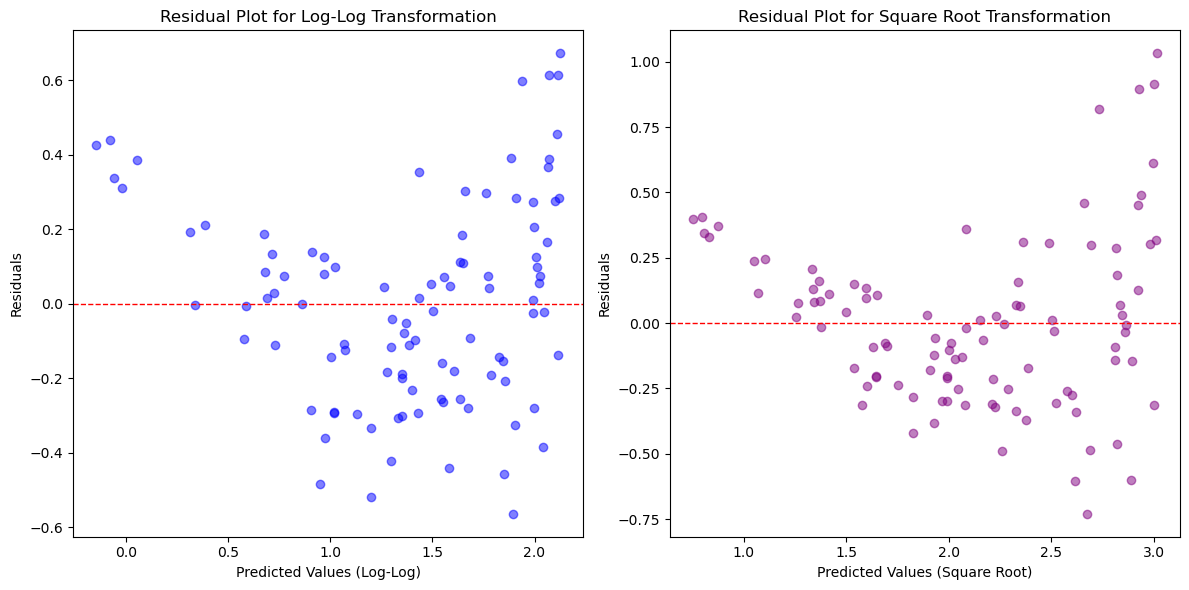

In [5]:
# 计算对数-对数模型的预测值和残差
predicted_log = model_log.predict(X_log)
residuals_log = y_log - predicted_log

# 计算平方根模型的预测值和残差
predicted_sqrt = model_sqrt.predict(X_sqrt)
residuals_sqrt = y_sqrt - predicted_sqrt

# 绘制对数-对数模型的残差图
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(predicted_log, residuals_log, color='blue', alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Predicted Values (Log-Log)')
plt.ylabel('Residuals')
plt.title('Residual Plot for Log-Log Transformation')

# 绘制平方根模型的残差图
plt.subplot(1, 2, 2)
plt.scatter(predicted_sqrt, residuals_sqrt, color='purple', alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Predicted Values (Square Root)')
plt.ylabel('Residuals')
plt.title('Residual Plot for Square Root Transformation')

plt.tight_layout()
plt.show()


### 6. Predict

- Predict the price for a 2500 sq ft house.
- Convert prediction back to original scale (it is currently in the transformed scale).

In [6]:
# Your code here
# 给定房屋面积
size = 2500

# 使用对数-对数模型预测
log_size = np.log(size)
predicted_log_price = model_log.predict([[log_size]])

# 将预测值转换回原始尺度
predicted_price = np.exp(predicted_log_price[0])

print("Predicted price for a 2500 sq ft house:", predicted_price)

Predicted price for a 2500 sq ft house: 4.881483182966481


### 7. Submit Results

- Show your code cell outputs and your plots to the TA